Ce notebook a pour but de passer en revue les différentes notions vues pendant le semestre de l'analyse univariée au clustering.
Nous ferons des rappels des notions théoriques essentielles avant de passer au code en R.
Pour réaliser ce notebook, un environnement sur Anaconda a été créé en R version 4.2.


Pour réaliser une analyse de données de façon générale, nous allons procéder de la même manière que dans le cours : 
- une étude univariée où l'on passe en revue les variables une à une,
- une étude bivariée avec les différents croisements possibles : quanti-quanti, quanti-quali, quali-quali
- une étude multivariée : ACP, TSNE(uniquement pour la visualisation de données), Clustering

**Attention, si vous compilez ce notebook, il vous faudra installer un certain nombre de packages comme FactoMineR et factoextra, il peut y avoir des problèmes de compatibilité de version**

# Lire des données en R

Dans ce chapitre, nous nous confrontons pour la première fois à des **données** qui peuvent être de différentes formats : 
- csv (comma separated value), txt
- fichiers audios
- vidéos, flux streaming
- images 
....

Dans ce cours, nous utilisons essentiellement des jeux de données au format csv ou txt.

Comment lire de tels fichiers ? Nous disposons de plusieurs commandes, les plus utilisées *pour nous* sont : read.table et read.csv
Si le fichier est écrit avec un espace pour séparer les valeurs => read.delim

In [1]:
fromage = read.table('data/fromage.txt')

In [2]:
# on peut visualiser l'ensemble des données directement
fromage

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20
Cantal,367,256.0,264.0,28.8,48.8,5.7,23.0,90,30
Chabichou,344,192.0,87.2,27.9,90.1,36.3,19.5,80,36
Chaource,292,276.0,132.9,25.4,116.4,32.5,17.8,70,25
Cheddar,406,172.0,182.3,32.5,76.4,4.9,26.0,110,28


In [3]:
# cependant les données (au format data.frame) sont de grands tableaux, difficile à lire sur leur entièreté : 
# on va plutôt utiliser la commande :
head(fromage)
# qui permet de ne lire que les premières lignes

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20
Cantal,367,256.0,264.0,28.8,48.8,5.7,23.0,90,30


In [4]:
# pour savoir le type d'objet que l'on lit
class(fromage)

[1] "data.frame"

In [5]:
# pour avoir un résumé des données 
summary(fromage)
# au passage vous constatez que ici nous n'avons que des variables quantitatives

    calories       sodium         calcium         lipides         retinol      
 Min.   : 70   Min.   : 22.0   Min.   : 72.6   Min.   : 3.40   Min.   : 37.10  
 1st Qu.:292   1st Qu.:140.0   1st Qu.:132.9   1st Qu.:23.40   1st Qu.: 51.60  
 Median :321   Median :223.0   Median :202.3   Median :26.30   Median : 62.30  
 Mean   :300   Mean   :210.1   Mean   :185.7   Mean   :24.16   Mean   : 67.56  
 3rd Qu.:355   3rd Qu.:276.0   3rd Qu.:220.5   3rd Qu.:29.10   3rd Qu.: 76.40  
 Max.   :406   Max.   :432.0   Max.   :334.6   Max.   :33.30   Max.   :150.50  
    folates        proteines      cholesterol       magnesium    
 Min.   : 1.20   Min.   : 4.10   Min.   : 10.00   Min.   :10.00  
 1st Qu.: 4.90   1st Qu.:17.80   1st Qu.: 70.00   1st Qu.:20.00  
 Median : 6.40   Median :21.00   Median : 80.00   Median :26.00  
 Mean   :13.01   Mean   :20.17   Mean   : 74.59   Mean   :26.97  
 3rd Qu.:21.10   3rd Qu.:23.40   3rd Qu.: 90.00   3rd Qu.:30.00  
 Max.   :36.40   Max.   :35.70   Max.   :120

In [6]:
# pour connaître le nom de chaque variable, son type, et quelques valeurs : 
str(fromage)

'data.frame':	29 obs. of  9 variables:
 $ calories   : int  314 314 401 342 264 367 344 292 406 399 ...
 $ sodium     : num  354 238 112 336 314 ...
 $ calcium    : num  72.6 209.8 259.4 211.1 215.9 ...
 $ lipides    : num  26.3 25.1 33.3 28.9 19.5 28.8 27.9 25.4 32.5 32.4 ...
 $ retinol    : num  51.6 63.7 54.9 37.1 103 ...
 $ folates    : num  30.3 6.4 1.2 27.5 36.4 5.7 36.3 32.5 4.9 1.3 ...
 $ proteines  : num  21 22.6 26.6 20.2 23.4 23 19.5 17.8 26 29.2 ...
 $ cholesterol: int  70 70 120 90 60 90 80 70 110 120 ...
 $ magnesium  : int  20 27 41 27 20 30 36 25 28 51 ...


Essayons un autre jeu de données par exemple DecathlonData.csv qui est donc au **format csv**

In [7]:
decathlon = read.csv('data/DecathlonData.csv', sep=";")
head(decathlon)

,X,centm,Longjump,Shotput,Highjump,quatrecentm,centdixhurdle,Discus,Polevault,Javeline,mille500m,Rank,Points,Competition
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
1,SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
2,CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
3,KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
4,BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
5,YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar
6,WARNERS,11.11,7.60,14.31,1.98,48.68,14.23,41.10,4.92,51.77,278.1,6,8030,Decastar


Vous remarquerez que j'ai précisé le séparateur en les valeurs avec l'argument "sep" sinon on aurait une seule colonne et tout collé :

In [8]:
head(read.csv('data//DecathlonData.csv'))

,X.centm.Longjump.Shotput.Highjump.quatrecentm.centdixhurdle.Discus.Polevault.Javeline.mille500m.Rank.Points.Competition
,<chr>
1,SEBRLE;11.04;7.58;14.83;2.07;49.81;14.69;43.75;5.02;63.19;291.7;1;8217;Decastar
2,CLAY;10.76;7.4;14.26;1.86;49.37;14.05;50.72;4.92;60.15;301.5;2;8122;Decastar
3,KARPOV;11.02;7.3;14.77;2.04;48.37;14.09;48.95;4.92;50.31;300.2;3;8099;Decastar
4,BERNARD;11.02;7.23;14.25;1.92;48.93;14.99;40.87;5.32;62.77;280.1;4;8067;Decastar
5,YURKOV;11.34;7.09;15.19;2.1;50.42;15.31;46.26;4.72;63.44;276.4;5;8036;Decastar
6,WARNERS;11.11;7.6;14.31;1.98;48.68;14.23;41.1;4.92;51.77;278.1;6;8030;Decastar


A noter que l'argument header pour read.table qui peut etre utilisé (header=T) ou non (header=F) si 
des noms de colonnes sont données ou non .

In [9]:
head(read.table('data//DecathlonData.txt', header=T))

,centm,Longjump,Shotput,Highjump,quatrecentm,centdixhurdle,Discus,Polevault,Javeline,mille500m,Rank,Points,Competition
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>
SEBRLE,"11,04","7,58","14,83","2,07","49,81","14,69","43,75","5,02","63,19","291,7",1,8217,Decastar
CLAY,"10,76","7,4","14,26","1,86","49,37","14,05","50,72","4,92","60,15","301,5",2,8122,Decastar
KARPOV,"11,02","7,3","14,77","2,04","48,37","14,09","48,95","4,92","50,31","300,2",3,8099,Decastar
BERNARD,"11,02","7,23","14,25","1,92","48,93","14,99","40,87","5,32","62,77","280,1",4,8067,Decastar
YURKOV,"11,34","7,09","15,19","2,1","50,42","15,31","46,26","4,72","63,44","276,4",5,8036,Decastar
WARNERS,"11,11","7,6","14,31","1,98","48,68","14,23","41,1","4,92","51,77","278,1",6,8030,Decastar


In [10]:
head(read.table('data//Test_Clusters_Atypiques.txt', header=F))
# qui va donc donner des noms aux variables "Vx" où x=numéro de la colonne

,V1,V2,V3,V4,V5,V6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.47319311,-0.78332710,-2.2840697,-0.7412980,1.7383314,-1.1842443
2,0.44531270,-0.25928100,-1.2395539,-0.2728209,-0.6629515,0.2156994
3,-0.14234457,-0.09990927,0.7210039,0.5116096,2.2720966,1.2206738
4,0.06148185,0.35069513,-0.1225570,1.1536019,0.1636325,1.6025955
5,-0.50575424,-0.27455307,0.8512339,-1.6854010,-1.1346486,-1.4099038
6,-1.92781683,0.43074294,-1.6425392,0.2845188,2.3528385,-1.3425569


In [11]:
# Regardons un jeu de données mixtes avec variables quantitatives et qualitatives : 
eco_europe = read.delim('data//EconomieEuropData.txt', header=T)
head(eco_europe)

,TCProd,Tchomage,TCPrix,PIB,DureeTravail,Population,ZoneEuro
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Allemagne,-0.6,5.5,2.0,37430.1,1413.0,81212.00,Zone Euro
Autriche,1.2,4.4,2.5,40064.8,1599.7,8452.84,Zone Euro
Belgique,-3.2,7.6,2.8,37727.8,1577.0,11106.96,Zone Euro
Danemark,-0.7,7.5,3.3,40189.9,1522.0,5505.40,Pas Euro
Espagne,-6.0,25.1,2.8,31903.8,1690.0,44975.36,Zone Euro
Estonie,-0.1,10.1,2.4,20393.3,1924.0,1334.37,Pas Euro


On va s'intéresser à ce dernier jeu de données le but de faire une présentation synthétique des données à travers les différentes notions vues pendant le semestre.

# Analyse univariée

In [12]:
# La statistique la plus connue est la moyenne : 
mean(eco_europe$PIB)

[1] 34851.64

Pour rappel, pour une variable quantitative, la moyenne de la série observée $(x_i)_{i \in \lbrace 1 , ...,n \rbrace}$ est donnée par la formule suivante :
$$
\bar{x} = \frac{1}{n} \underset{i=1}{\overset{n}{\sum}}x_i
$$

On peut aussi regarder la médiane, (en ordonnant les valeurs par valeurs croissantes par exemple) définie par : 
$$ 
med(x) = x_{k} \ où \ k=\frac{1+n}{2}
$$
si $n$ est impair, $k$ est entier, donc on prend la valeur $x_k$ pour de la série observée ordonnée, 
sinon $n$ est pair, med(x) est la moyenne des valeurs $x_{E(k)}$ et $x_{E(k)+1}$ où $E(k)$ est la partie entière.

Enfin la dernière valeur classique est la variance : 
$$ 
        Var(x) = \frac{1}{n}\underset{i=1}{\overset{n}{\sum}}(x_i-\bar{x})²
$$

Cependant dans R, on considère la version non biaisée : $s^{*^2} = \frac{n}{n-1}Var(x)$.
La notion de biais sera vu en Ing2 dans le module de Statistiques Inférentielles.

In [13]:
# mediane du PIB en Europe
median(eco_europe$PIB)

# Variance du PIB en Europe
var(eco_europe$PIB)


[1] 34971.55

[1] 201751764

In [14]:
# On s'intéresse aussi à la fréquence de modalité :
# ici on observe la série avec les différentes modalités (levels)
eco_europe$ZoneEuro

[1] "Zone Euro" "Zone Euro" "Zone Euro" "Pas Euro"  "Zone Euro" "Pas Euro" 
 [7] "Zone Euro" "Zone Euro" "Zone Euro" "Pas Euro"  "Zone Euro" "Zone Euro"
[13] "Zone Euro" "Zone Euro" "Pas Euro"  "Zone Euro" "Zone Euro" "Pas Euro" 
[19] "Pas Euro"  "Pas Euro"

In [15]:
# on convertit la dernière colonne en table pour avoir l'effectif de chaque modalité que l'on divise par 
# le nombre total de pays pour obtenir la fréquence

print('Effectif')
table(eco_europe$ZoneEuro)
print('------------------------------------')

print('Fréquence')
table(eco_europe$ZoneEuro)/nrow(eco_europe)

[1] "Effectif"



 Pas Euro Zone Euro 
        7        13 

[1] "------------------------------------"
[1] "Fréquence"



 Pas Euro Zone Euro 
     0.35      0.65 

Rappelons que la définition de fréquence d'une modalité $i$ est :
$$
f_i = n_i/n
$$
où $n_i$ est l'effectif de la modalité et $n$ l'effectif total.

## Représentation graphique 

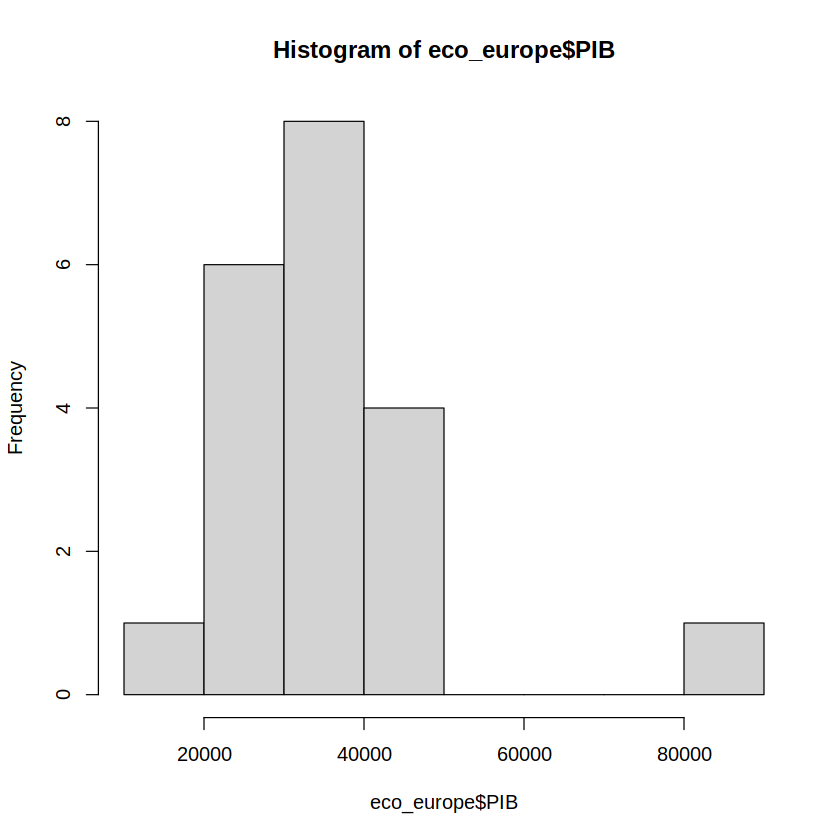

In [16]:
# voici un histogramme du PIB où il y a un regroupement par classe des PIB (on n'a pas un baton par valeur de PIB)
hist(eco_europe$PIB)

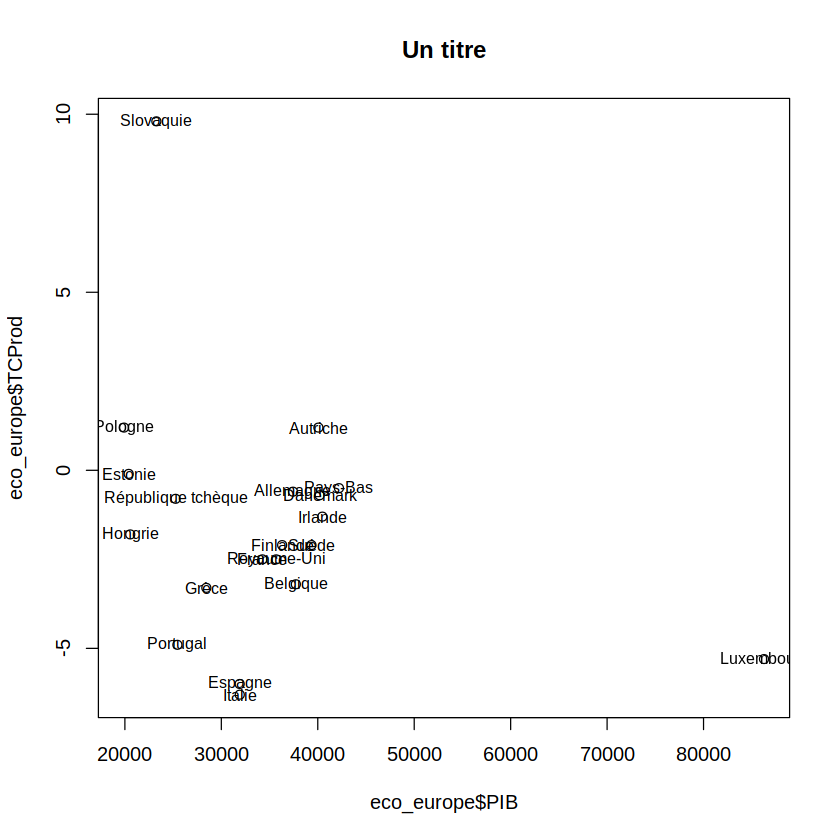

In [17]:
plot(x=eco_europe$PIB, y=eco_europe$TCProd, main='Un titre') # affiche un nuage de points 
# en abcisse : les PIB
# en ordonnée : le TCProd
text(eco_europe$PIB, eco_europe$TCProd, row.names(eco_europe), cex=0.8)
# permet d'ajouter du texte : ici le nom des pays (qui est le nom des lignes )

## Indicateurs de position et de dispersion

On rappelle que le **mode** d'une série qualitative est la modalité la plus observée.

- Les **indicateurs de position** (moyenne, mode, médiane, quartiles) positionne la série des valeurs observées autour d'une tendance centrale, 
- Les **indicateurs de dispersion** (variance, écart-type, étendue inter-quartile mesurent la flutuation des valeurs de la série autour de tendances centrales.

**Definition :** 
- le 1er quartile $Q_1$ est la valeur qui sépare la série en 2 avec 1/4 des valeurs en dessous et les 3/4 au dessus, 
- le 2ème quartile est la médiane $med(x)$ (autour de valeur au dessous et en dessous), 
- le 3ème quartile $Q_3$ est la valeur qui sépare les 3/4 des valeurs en dessous et 1/4 au dessus.

In [18]:
quantile(eco_europe$PIB)

0%      25%      50%      75%     100% 
19908.20 25397.67 34971.55 39525.40 86269.40

Le 0% correspond à la valeur minimale et le 100% à la valeur maximale.

D'autres valeurs classiques sont :
- l'**écart-type** $s=\sqrt{var(x)}$  (en R $\sqrt(s²)$), 
- l'**écart médian** = $ \frac{1}{n}\underset{i=1}{\overset{n}{\sum}}n_i\vert x_i - med(x) \vert$,
- l'**étendue** = $max(x) - min(x)$,
- l'**écart inter-quartiles** = $Q_3 - Q_1$

## Mettre à l'échelle des données 
Pourquoi faire ? 
Certaines procédures comme l'ACP vont mesurer des distances entre des vecteurs et :
- un vecteur est un *individu* de la population observée
- chaque composante de ce vecteur correspond à une *variable descriptive*
Le problème est que les variables prenant de grandes valeurs vont écraser les autres variables qui sont à des *échelles* plus petites.

On va donc mettre à l'échelle les données avec la fonction *scale* de R qui transforme la variable $x$ de la manière suivante : 
$$
x_i \mapsto \tilde{x_i}=\frac{x_i -bar(x)}{s_x}
$$
$x_i$ est la i-ime observation de la série $x$, de moyenne $\bar{x}$ et d'écart-type $s_x$.

In [19]:
# En R, cela donne :
eco_europe_scale = scale(eco_europe[,1:6])
head(eco_europe_scale)

,TCProd,Tchomage,TCPrix,PIB,DureeTravail,Population
Allemagne,0.2875098,-0.88429121,-0.34449693,0.1815310,-1.46985722,2.3033267
Autriche,0.8102548,-1.07502069,0.06079358,0.3670219,-0.45698571,-0.5783271
Belgique,-0.4675664,-0.52017130,0.30396788,0.2024900,-0.58013613,-0.4732097
Danemark,0.2584684,-0.53751034,0.70925839,0.3758293,-0.87851820,-0.6950616
Espagne,-1.2807253,2.51416129,0.30396788,-0.2075372,0.03290341,0.8681610
Estonie,0.4327167,-0.08669522,-0.02026453,-1.0179112,1.30238350,-0.8602568


In [20]:
# regardons la moyenne de chaque colonne sur nos données standardisées
colMeans(eco_europe_scale[,1:6])

TCProd      Tchomage        TCPrix           PIB  DureeTravail 
 9.020562e-18  5.724587e-17  1.247266e-16  2.199629e-16  3.061570e-16 
   Population 
-6.661338e-17

In [21]:
# pour la variance, la fonction var va donner la matrice de covariance, 
# pour lire la variance on regarde seulement les coefficients diagonaux
var(eco_europe_scale[,1:6])

,TCProd,Tchomage,TCPrix,PIB,DureeTravail,Population
TCProd,1.00000000,-0.186949538,0.35007053,-0.3206927,0.07476923,-0.224031421
Tchomage,-0.18694954,1.000000000,0.07752276,-0.3613053,0.46859792,0.002759638
TCPrix,0.35007053,0.077522763,1.00000000,-0.1857686,-0.24871312,-0.268837298
PIB,-0.32069268,-0.361305263,-0.18576864,1.0000000,-0.52451201,-0.120074797
DureeTravail,0.07476923,0.468597918,-0.24871312,-0.5245120,1.00000000,-0.267748090
Population,-0.22403142,0.002759638,-0.26883730,-0.1200748,-0.26774809,1.000000000


Rappelons que la covariance entre deux variables quantitatives $X$ et $Y$ est définie par : 
$$
cov(X,Y) = \mathbb{E}((X-\mathbb{E}(X))(Y-\mathbb{E}(Y))).
$$

Quelques autres représentations : 

In [22]:
table(eco_europe$ZoneEuro)/nrow(eco_europe)


 Pas Euro Zone Euro 
     0.35      0.65 

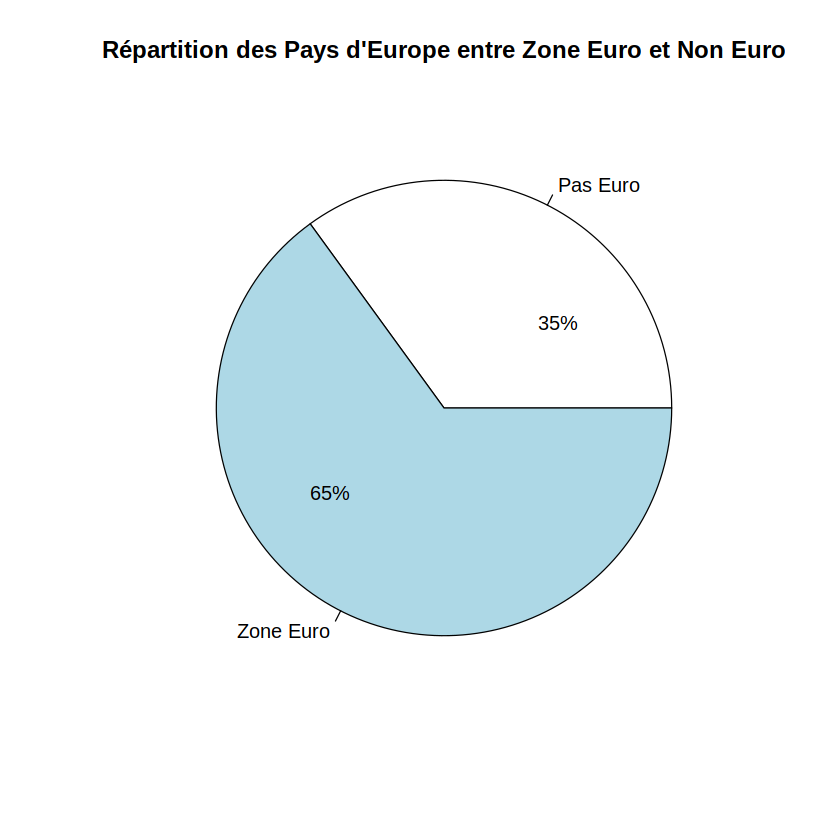

In [23]:
pie(table(eco_europe$ZoneEuro), main='Répartition des Pays d\'Europe entre Zone Euro et Non Euro')
text( 0.4,0.3 , "35%")
text(-0.4,-0.3, "65%")

# Passons à de l'analyse bivariée  quanti -quanti


On considère deux variables $X$ et $Y$.

On va principalement ici utiliser la covariance ainsi que le **coefficient de corrélation linéaire ou coefficient de Pearson** défini par : 
$$
r_{xy} = \frac{c_{xy}}{s_xs_y}
$$
où $c_{xy}$ est la covariance entre les deux variables et $s_x$ écart-type de $X$ et $s_y$ écart-type de $Y$.

On peut alors introduire la **droite de régression** qui est la droite qui "passe au plus proche de tous les points du nuage de points entre $X$ et $Y$.

Elle est obtenue par minimisation de l'erreur quadratique moyenne (voir cours).

Son coefficient directeur est : 
$$
\hat{a} = r_{xy}\frac{s_y}{s_x}.
$$

Plus $\vert r_{xy} \vert$ est proche de 1 plus la droite montre la corrélation de $X$ et $Y$.
Si proche de 0 alors faible corrélation.

Une fois que l'on a écrit la droite de régression $\hat{y} = \hat{a}x + \hat{b}$ on peut **prédire** des valeurs de $y$ pour de nouvelles valeurs de $x$.

Pour mettre en place cette démarche, nous allons étudier la correlation entre la population et le PIB.

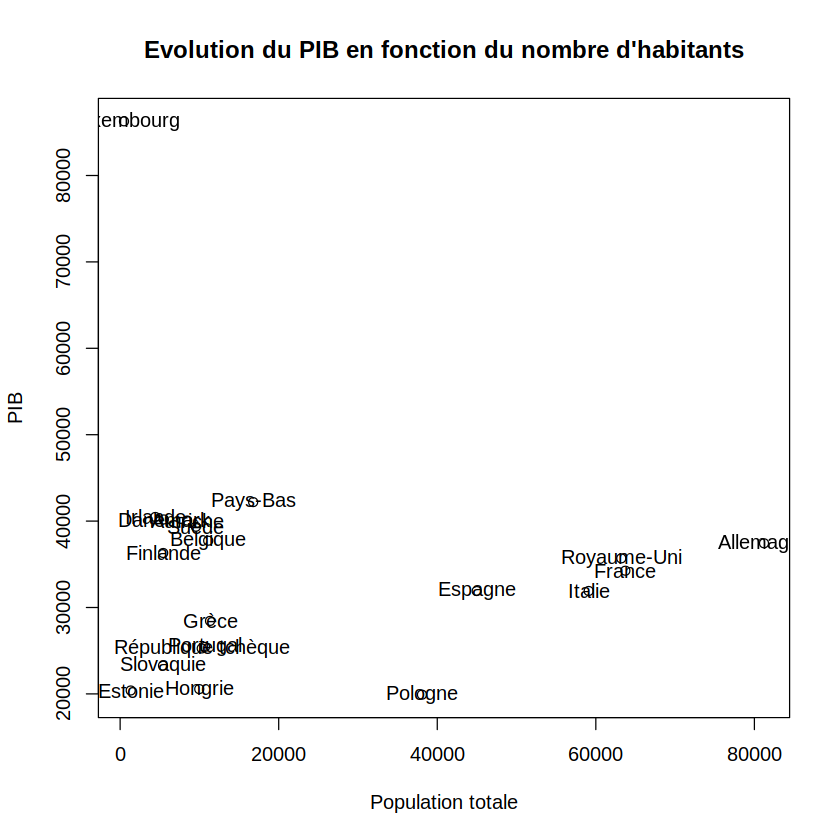

In [24]:
plot(eco_europe$Population,eco_europe$PIB,  main='Evolution du PIB en fonction du nombre d\'habitants', 
    xlab='Population totale', ylab='PIB')
text(eco_europe$Population,eco_europe$PIB, rownames(eco_europe))

In [25]:
# regardons en premier lien la corrélation entre les deux variables 
# on considère X = population et Y = PIB

cor(eco_europe$Population, eco_europe$PIB)
# On est proche de 0 ce n'est pas terrible

[1] -0.1200748

In [26]:
# créons notre modèle de régression linéaire
model = lm(Population~PIB, data=eco_europe)

In [27]:
# que nous dit le modèle ? 
summary(model)


Call:
lm(formula = Population ~ PIB, data = eco_europe)

Residuals:
   Min     1Q Median     3Q    Max 
-24807 -16198 -12815  14191  58707 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) 30494.0401 15598.6330   1.955   0.0663 .
PIB            -0.2134     0.4160  -0.513   0.6141  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25750 on 18 degrees of freedom
Multiple R-squared:  0.01442,	Adjusted R-squared:  -0.04034 
F-statistic: 0.2633 on 1 and 18 DF,  p-value: 0.6141


La droite de regression a pour équation : 
$$
y= -0.2134 x + 30494.0401 
$$

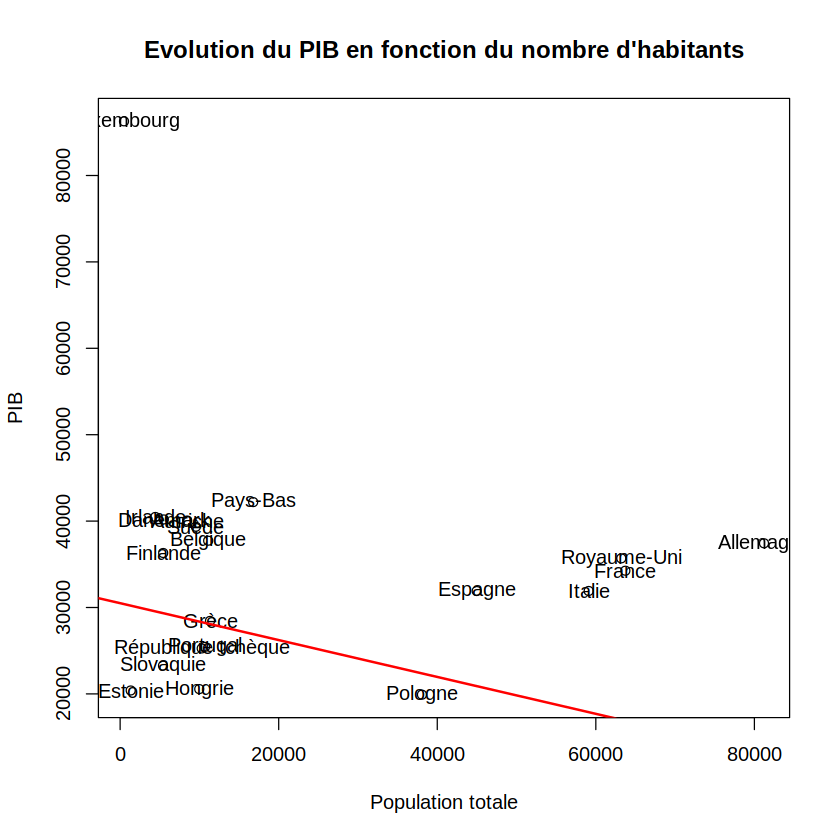

In [28]:
plot(eco_europe$Population,eco_europe$PIB,  main='Evolution du PIB en fonction du nombre d\'habitants', 
    xlab='Population totale', ylab='PIB')
text(eco_europe$Population,eco_europe$PIB, rownames(eco_europe))
abline(model$coef[1], model$coef[2], col='red', lwd=2)

Il apparaît que la Pologne et le Luxembourg sont des **outliers** et modifient les résultats, on pourrait donc relancer le model lm sans ces deux pays.

In [29]:
# On s'intéresse maintenant au résidu :
#résidents studentisés
restd = rstudent(model)
restd
mean(restd)

Allemagne           Autriche           Belgique           Danemark 
         2.7278355         -0.5285125         -0.4418330         -0.6456165 
           Espagne            Estonie           Finlande             France 
         0.8423434         -1.0190032         -0.6795773          1.6975611 
             Grèce            Hongrie            Irlande             Italie 
        -0.5134049         -0.6506180         -0.6864241          1.4559707 
        Luxembourg           Pays-Bas            Pologne           Portugal 
        -0.8765496         -0.1838833          0.4756469         -0.5681195 
         Slovaquie République tchèque        Royaume-Uni              Suède 
        -0.8088959         -0.5866533          1.6874008         -0.4904766

[1] 0.01035953

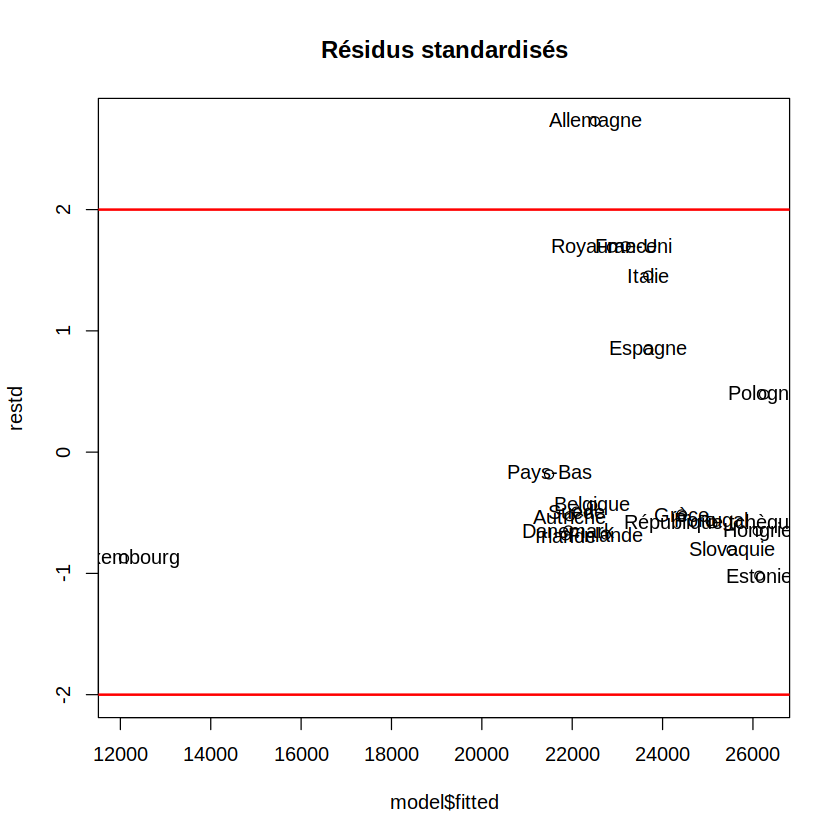

In [30]:
plot(model$fitted, restd, ylim = range(-2,2,restd), main="Résidus standardisés")
abline(h=2, col='red', lwd = 2)
abline(h=-2, col='red', lwd=2)
text(model$fitted, restd, row.names(eco_europe))

On va que l'Allemagne sort du lot dans son résidus studendisés est en dehors de $[-2,2]$ bien qu'il y ait l'hypothèse de normalité.

# ACP

La régression linéaire fait apparaître des corrélations linéaires entre deux variables. 
On aimerait pouvoir faire la même chose avec plus de variables quantitatives : l'**Analyse par Composantes Principales** est une solution.
L'idée de l'ACP est de trouver un nouvel espace dans lequel on va pouvoir étudier nos données.
Cet espace est construit en prenant comme nouveaux axes des **combinaisons linéaires des axes initiaux tout en cherchant à maximiser l'inertie (variance)**.

Le but est ainsi d'avoir des nuages de points le plus étalé possible pour distinguer au mieux les points entre eux.

Pour réaliser une ACP nous allons utiliser la librairie FactoMineR, voir http://factominer.free.fr/index_fr.html

In [32]:
# il suffit ensuite de la charger
library(FactoMineR)

Comme l'ACP réside dans un calcul de distance, il faut à tout prix **standardiser les données** donc les mettre à l'échelle avec la fonction *scale*.

In [39]:
acp = PCA(X = eco_europe_scale, scale.unit = T, ncp=ncol(eco_europe_scale), graph=T, axes=c(1,2))

# X = les données
# scale.unit = T car données scalées,
# ncp = nombre de composantes principales => on prend autant de dimensions que de variables initiales
# graph =T pour les sorties graphiques, 
# axes = les axes que l'on souhaite afficher

In [42]:
# savoir le pourcentage de variance de chaque axe avec la valeur propre associée et la variance cumulée
acp$eig

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,1.9569252,32.615420,32.61542
comp 2,1.5791592,26.319320,58.93474
comp 3,1.0548851,17.581419,76.51616
comp 4,0.9042745,15.071241,91.58740
comp 5,0.3597840,5.996400,97.58380
comp 6,0.1449720,2.416199,100.00000


Ici il faut remarquer qu'à partir de 4 axes l'inertie n'augmente plus aussi vite, on pourrait donc utiliser 4 dimensions pour représenter les données

In [43]:
acp$var
# en sortie : 
#- coordonnées des variables 
#- corrélation entre variables et axes
#- cos de l'angle entre variable et axe
#- pourcentage de contribution d'une variable à un axe

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6
TCProd,0.3394241,0.726103553,0.19250510,-0.4363879,0.36065196,0.001557389
Tchomage,0.6514291,-0.395732836,-0.01300387,0.5482270,0.33589449,-0.074084925
TCPrix,0.1958888,0.748579369,0.19276532,0.5631695,-0.14298110,0.162771423
PIB,-0.8096605,-0.003252962,-0.46001538,0.1363208,0.28908464,0.175133761
DureeTravail,0.8105354,-0.322941009,-0.31611697,-0.2738543,-0.06900967,0.243008353
Population,-0.2578108,-0.480266399,0.81789686,-0.0504757,0.09007326,0.152517282
,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6
TCProd,0.3394241,0.726103553,0.19250510,-0.4363879,0.36065196,0.001557389
Tchomage,0.6514291,-0.395732836,-0.01300387,0.5482270,0.33589449,-0.074084925
TCPrix,0.1958888,0.748579369,0.19276532,0.5631695,-0.14298110,0.162771423


In [44]:
acp$ind
# on a la même chose pour les individus

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6
Allemagne,-1.81749625,-0.2704889,2.2630415,-0.53218347,0.37168550,0.09643453
Autriche,-0.68342617,1.2111059,-0.3153728,-0.75991574,0.01364814,-0.11904292
Belgique,-0.69688174,0.4146292,-0.3211010,0.32412374,-0.56593677,-0.24359772
Danemark,-0.70455987,1.2635443,-0.2699060,0.34402960,-0.14038555,-0.26408493
Espagne,0.90468148,-1.7343107,0.5738756,2.18727355,0.60733361,-0.09355738
Estonie,1.60471903,0.2687778,-0.5659253,-0.75500149,-0.56751675,0.02913859
Finlande,-0.03398579,1.0787191,-0.4092278,0.55176017,-0.72959157,0.38586954
France,-1.00552139,-0.2825224,1.7000946,0.50752407,0.08337664,0.04956844
Grèce,2.43995167,-1.5871520,-0.9608124,0.83054500,0.62522952,0.20547696
Hongrie,1.55235411,-0.7289722,-0.6245803,-0.99050436,-0.59142205,0.02444981


In [45]:
acp$svd
# comme cela  a été évoqué en cours, l'ACP est le résultat d'une SVD (décomposition en valeurs singulières)
# cela permet d'obtenir des résultats plus stables numériquement

-1.29923111,-0.2152467,2.2033827,-0.55964321,0.61966176,0.25327397
-0.48854491,0.9637606,-0.3070589,-0.79912608,0.02275373,-0.31265226
-0.49816358,0.3299491,-0.3126361,0.34084797,-0.94351105,-0.63978084
-0.50365226,1.0054894,-0.2627907,0.36178093,-0.23404613,-0.69358809
0.64670852,-1.3801108,0.5587470,2.30013308,1.01252649,-0.24571747
1.14712802,0.2138850,-0.5510063,-0.79395825,-0.94614515,0.07652909
-0.02429463,0.8584113,-0.3984396,0.58023004,-1.21635093,1.01344106
-0.71879360,-0.2248226,1.6552763,0.53371144,0.13900278,0.13018569
1.74419127,-1.2630064,-0.9354833,0.87339968,1.04236196,0.53966114
1.10969513,-0.5800935,-0.6081150,-1.04161267,-0.98599926,0.06421456
0.09537769,1.3405462,-0.1000880,2.17880607,0.13807572,0.59965652


In [46]:
acp$call

$row.w
 [1] 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
[16] 0.05 0.05 0.05 0.05 0.05

$col.w
[1] 1 1 1 1 1 1

$scale.unit
[1] TRUE

$ncp
[1] 6

$centre
[1]  1.387779e-17  2.775558e-17  1.353084e-16  2.220446e-16  2.914335e-16
[6] -5.551115e-17

$ecart.type
[1] 0.9746794 0.9746794 0.9746794 0.9746794 0.9746794 0.9746794

$X
                        TCProd    Tchomage      TCPrix         PIB
Allemagne           0.28750977 -0.88429121 -0.34449693  0.18153104
Autriche            0.81025480 -1.07502069  0.06079358  0.36702189
Belgique           -0.46756639 -0.52017130  0.30396788  0.20249002
Danemark            0.25846838 -0.53751034  0.70925839  0.37582931
Espagne            -1.28072533  2.51416129  0.30396788 -0.20753721
Estonie             0.43271672 -0.08669522 -0.02026453 -1.01791125
Finlande           -0.14811109 -0.50283226  1.19560700  0.10246140
France             -0.26427666 -0.06935617  0.30396788 -0.04191409
Grèce              -0.49660778  2.375448

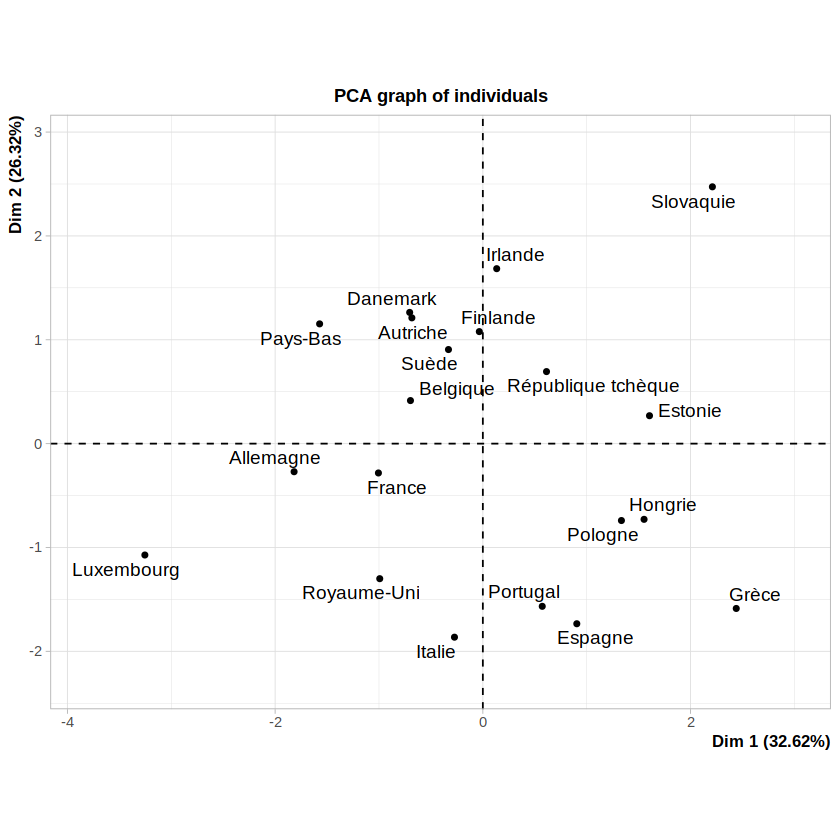

In [49]:
plot(acp)
# On a simplement ici la projections des individus (les pays) dans le premier plan factoriel

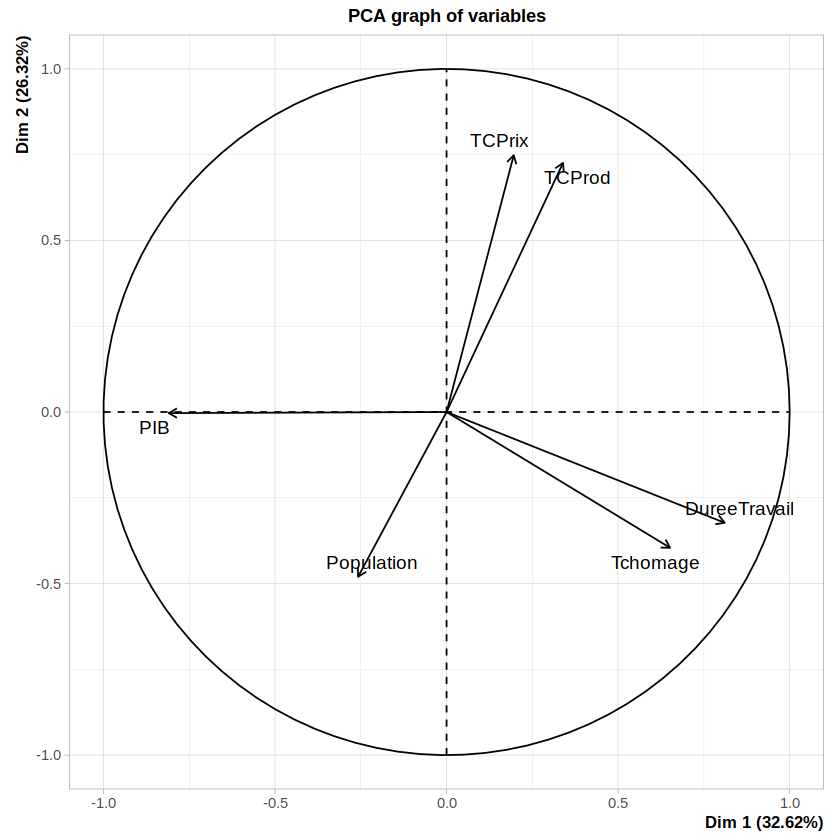

In [77]:
# Now let's plot the Variable factor map
plot.PCA(acp, axes=c(1, 2), choix="var", habillage='none')

Ici se situe le gros du travail : comment interprêter le cercle de corrélation des variables sur le premier plan factoriel?
- Aucun vecteur ne touche le bord du cercle : ils sont tous plus ou moins bien représentés
La variable Population est la moins bien représenté ici avec un vecteur très court
- TCPrix et TCProd vont dans la même direction avec un angle très faible : ceux sont deux variables corrélées, de même pour DureeTravailet Tchomage
- L'angle entre TCPrix (ou TCProd) et TChomage (ou DureeTravail) est proche de 90° : ces deux groupes sont non corrélés
- l'angle entre PIB et DuréeTravail sont en sens opposé : on peut l'interprếter comme si la durée de travail diminue alors le PIB augmente, plus le chomage diminie plus le PIB augmente.

In [74]:
library(factoextra)
library(ggplot2)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



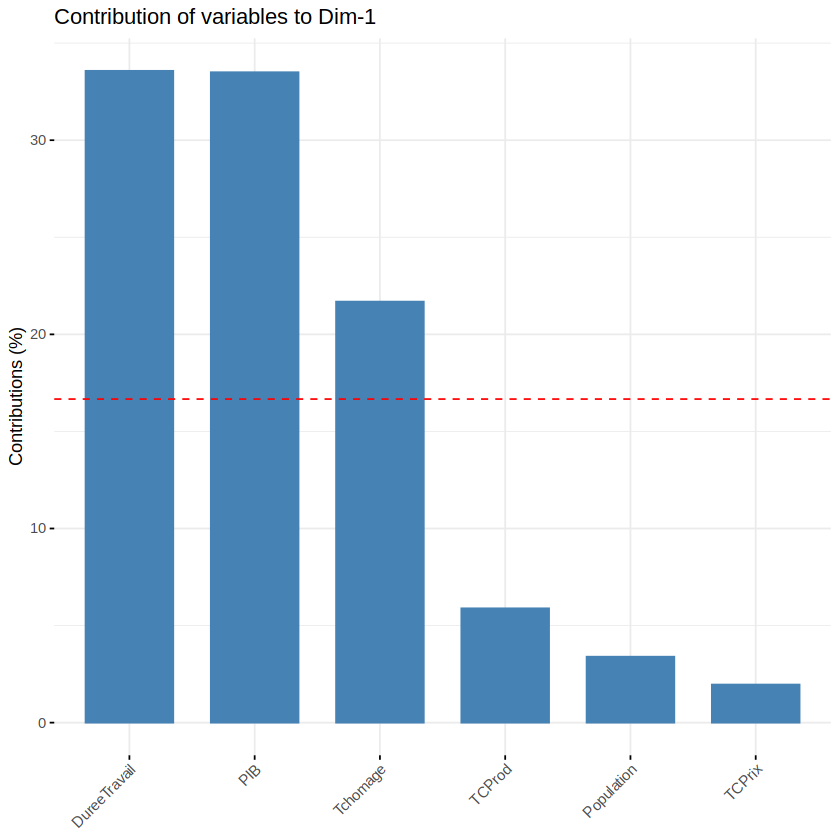

In [76]:
fviz_contrib(acp, choice="var", axes = 1, top = 6 )
# voici la contribution des variables à l'axe 1

##### Autres visualisations de l'ACP avec factoextra

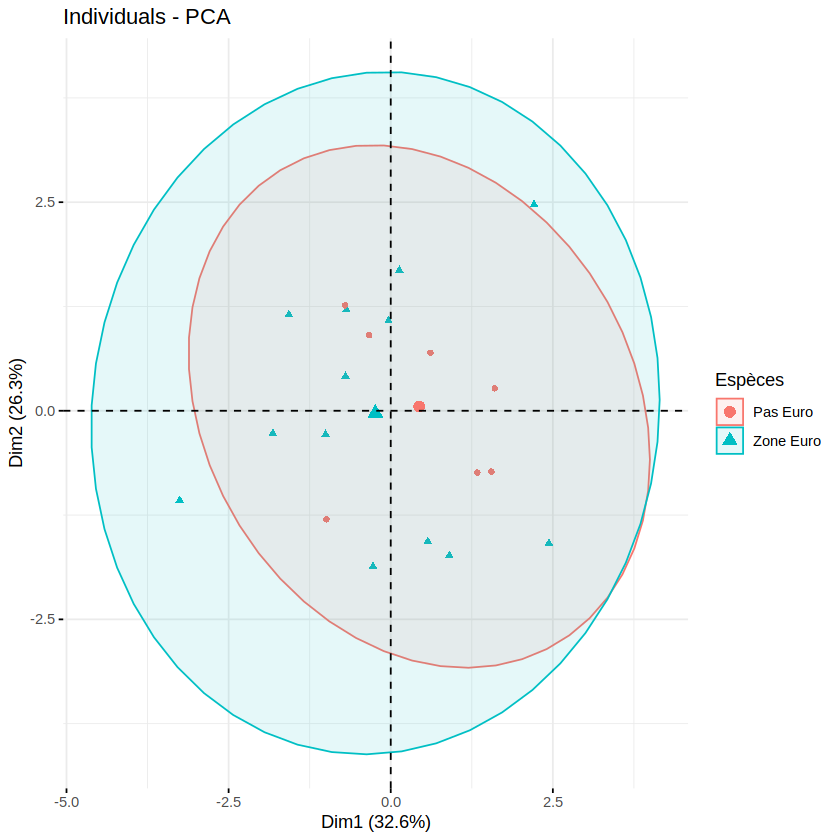

In [83]:
fviz_pca_ind(acp, axes = c(1,2), geom.ind = "point", col.ind=eco_europe$ZoneEuro,
             addEllipses = TRUE, legend.title = "Espèces")

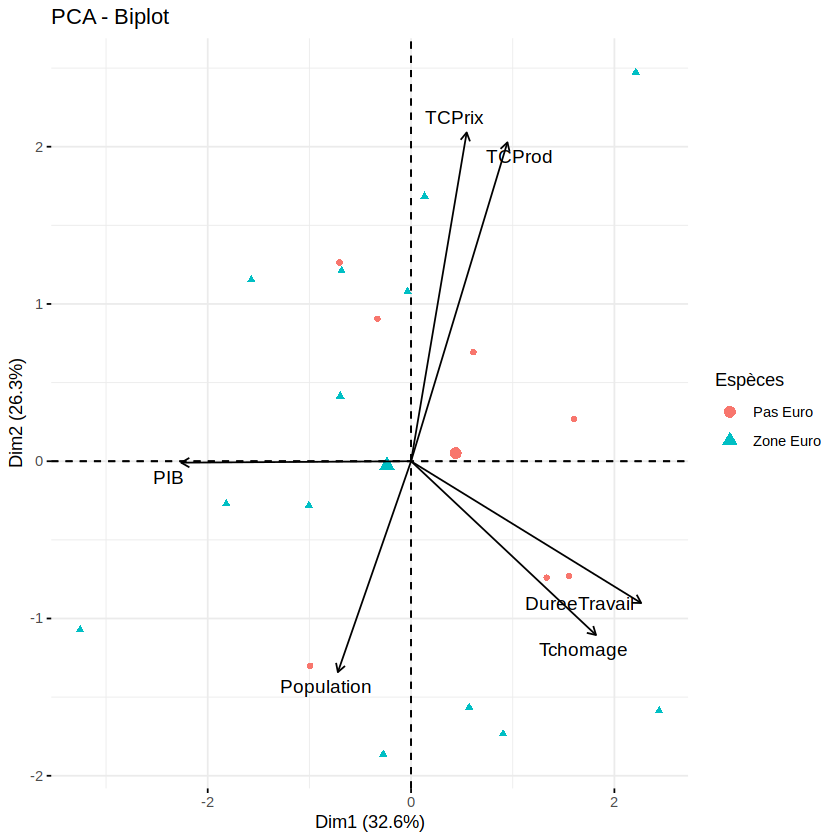

In [85]:
#Biplot variables - individus
fviz_pca_biplot (acp, col.ind = eco_europe$ZoneEuro, label = "var",
                col.var = "black", repel = TRUE, legend.title = "Espèces")

# Analyse bivariée quanti-quali
On va s'intéresser au lien entre PIB et le fait d'appartenir ou non à la zone euro : 

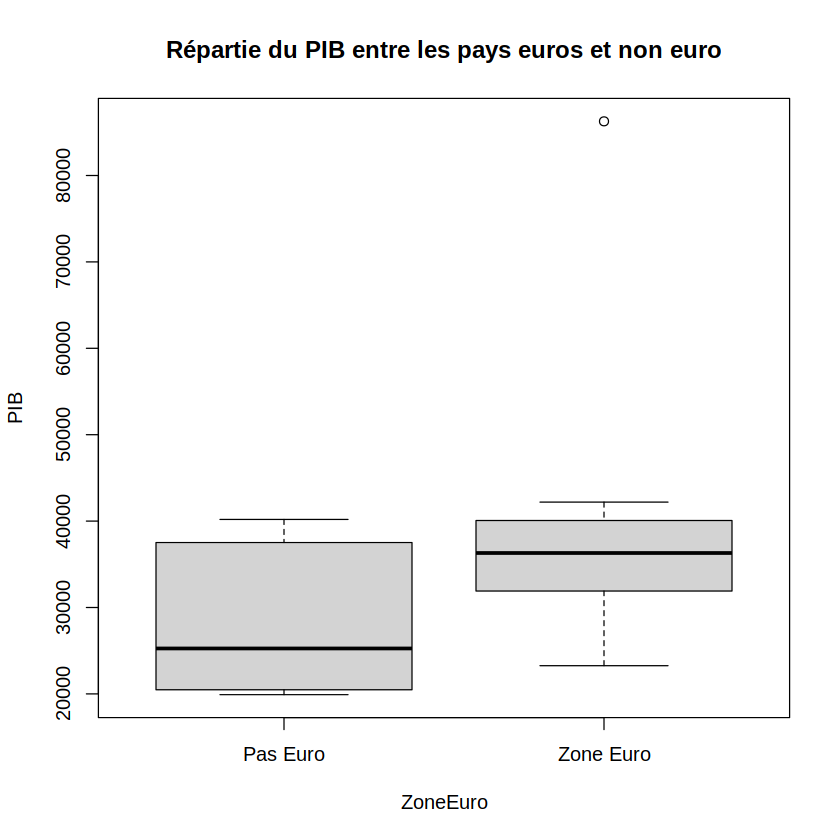

In [88]:
boxplot(PIB~ZoneEuro, data = eco_europe, main="Répartie du PIB entre les pays euros et non euro")
# on remarque une nette différence de la médiane et la présence d'un outlier dans la ZoneEuro 

In [91]:
eco_europe[eco_europe$PIB > 80000,]
# c'est le Luxembourg !

,TCProd,Tchomage,TCPrix,PIB,DureeTravail,Population,ZoneEuro
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Luxembourg,-5.3,5.1,0,86269.4,1601,487.94,Zone Euro


Dans ce chapitre on s'intéresse essentiellement à la variance et aux variations de la variance entre les différents groupes considérés (Euro ou non Euro ici).
Les quantités d'intérêts sont donc : 
- à l'échelle de chaque groupe : leur moyenne et variance, 
- à l'échelle du jeu de données complet : moyenne, variance, variance intra classe et variance inter classe.

Pour rappel :  
- la moyenne globale est $\bar{y} = \frac{1}{n}\underset{k=1}{\overset{p}{\sum}}n_k\bar{y}_k$ où $p$ est le nombre de classe (groupe) (2 groupes ici), $n_k$ effectif du groupe $k$, $\bar{y}_k$ moyenne du groupe $k$,  
- $var^{intra}(Y) = \frac{1}{n}\underset{k=1}{\overset{p}{\sum}}n_ks_k^2$ est la variance intra, où $s_k^2$ est la variance du groupe $k$,
- $var^{inter}(Y)= \frac{1}{n}\underset{k=1}{\overset{p}{\sum}}n_k(\bar{y}_k-\bar{y})^2$  est la variance interclasse où $\bar{y}_k$ est la moyenne du groupe $k$.

On rappelle aussi la **formule de décomposition de la variance** : 
$$ Var^{tot}(Y) = var^{inter} + var^{intra} $$

La quantité d'intérêt ici est le **rapport de corrélation** :
$$ \frac{var^{inter}(Y)}{var^{intra}(Y)}$$

Si ce rapport est proche de 1 alors la variance expliquée est égale à la variance de $Y$: les variations de $Y$ sont entièrement expliquée par $X$, 
si c'est proche de $0$ alors pas de lien entre $X$ et $Y$.  
Mettons en oeuvre ces calculs.

In [97]:
# On définit deux sous dataframes : un pour la zone euro, et l'autre pour les pays non euro
euro = eco_europe[eco_europe$ZoneEuro == 'Zone Euro','PIB']
non_euro = eco_europe[eco_europe$ZoneEuro == 'Pas Euro', 'PIB']

In [156]:
var(non_euro)

[1] 86435279

In [152]:
eco_europe

,TCProd,Tchomage,TCPrix,PIB,DureeTravail,Population,ZoneEuro
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Allemagne,-0.6,5.5,2.0,37430.1,1413.0,81212.00,Zone Euro
Autriche,1.2,4.4,2.5,40064.8,1599.7,8452.84,Zone Euro
Belgique,-3.2,7.6,2.8,37727.8,1577.0,11106.96,Zone Euro
Danemark,-0.7,7.5,3.3,40189.9,1522.0,5505.40,Pas Euro
Espagne,-6.0,25.1,2.8,31903.8,1690.0,44975.36,Zone Euro
Estonie,-0.1,10.1,2.4,20393.3,1924.0,1334.37,Pas Euro
Finlande,-2.1,7.7,3.9,36307.0,1684.0,5430.39,Zone Euro
France,-2.5,10.2,2.8,34256.3,1476.0,63724.44,Zone Euro
Grèce,-3.3,24.3,2.0,28443.8,2032.0,11338.13,Zone Euro


In [168]:
class(euro)

[1] "numeric"

In [166]:
# calculons pour chaque groupe la moyenne et la variance

moy_euro = mean(euro)
var_euro = var(euro)*(length(euro)-1)/(length(euro))

moy_neuro = mean(non_euro)
var_neuro = var(non_euro)*(length(non_euro)-1)/(length(non_euro))

# il va nous falloir moyenne et variance globale aussi :
moy_tot = mean(eco_europe$PIB)
var_tot = (nrow(eco_europe)-1)*var(eco_europe$PIB)/(nrow(eco_europe))

Remarque sur le code : j'ai du utiliser length pour euro et non_euro car c'est de type numéric et nrow(eco_europe) car eco_europe est de type dataframe

In [172]:
# calculons maintenant la variance intra 
variance_intra = (1/nrow(eco_europe))*(length(euro)*var_euro + length(non_euro)*var_neuro)

# puis la variance inter 
variance_inter = (1/nrow(eco_europe))*(length(euro)*(moy_euro-moy_tot)^2 + length(non_euro)*(moy_neuro-moy_tot)^2)

In [173]:
var_euro
var_neuro

[1] 224259081

[1] 74087382

In [176]:
# vérifions la formule de décomposition de la variance : 

print(var_tot)

print(variance_inter)

print(variance_intra)

[1] 191664176
[1] 19965189
[1] 171698986


In [181]:
# Pour conclure : 
floor(var_tot) == floor(variance_inter + variance_intra)

[1] TRUE

La formule de la décomposition de la variance est bien vérifiée !
J'ai utilisé floor pour éviter des problèmes de décimales et d'arrondis machine.

# Passons maintenant à du clustering !

L'objectif ici sera de voir si avec les KMeans et du clustering hiérarchique ascendant on retrouve bien les deux groupes : un groupe des pays de la zone euro et l'autre groupe des pays n'en faisant pas partie.

In [183]:
# on a déjà standardisé nos données !
eco_europe_scale

,TCProd,Tchomage,TCPrix,PIB,DureeTravail,Population
Allemagne,0.28750977,-0.88429121,-0.34449693,0.18153104,-1.4698572243,2.3033267
Autriche,0.81025480,-1.07502069,0.06079358,0.36702189,-0.4569857098,-0.5783271
Belgique,-0.46756639,-0.52017130,0.30396788,0.20249002,-0.5801361296,-0.4732097
Danemark,0.25846838,-0.53751034,0.70925839,0.37582931,-0.8785182041,-0.6950616
Espagne,-1.28072533,2.51416129,0.30396788,-0.20753721,0.0329034051,0.8681610
Estonie,0.43271672,-0.08669522,-0.02026453,-1.01791125,1.3023835036,-0.8602568
Finlande,-0.14811109,-0.50283226,1.19560700,0.10246140,0.0003526334,-0.6980324
France,-0.26427666,-0.06935617,0.30396788,-0.04191409,-1.1280741209,1.6107253
Grèce,-0.49660778,2.37544894,-0.34449693,-0.45113168,1.8882973953,-0.4640541
Hongrie,-0.06098692,0.05201713,-0.74978744,-1.00648484,1.6061907067,-0.5178564


## Kmeans 

**Remarque importante : ici on s'impose deux groupes, dans les faits, on va regarder pour k=2 à n groupes l'augmentation de l'inertie et si on obtient un coude alors l'abcisse correspond au nombre de groupes à choisir en paramètre**, on va tout de même réaliser le test :

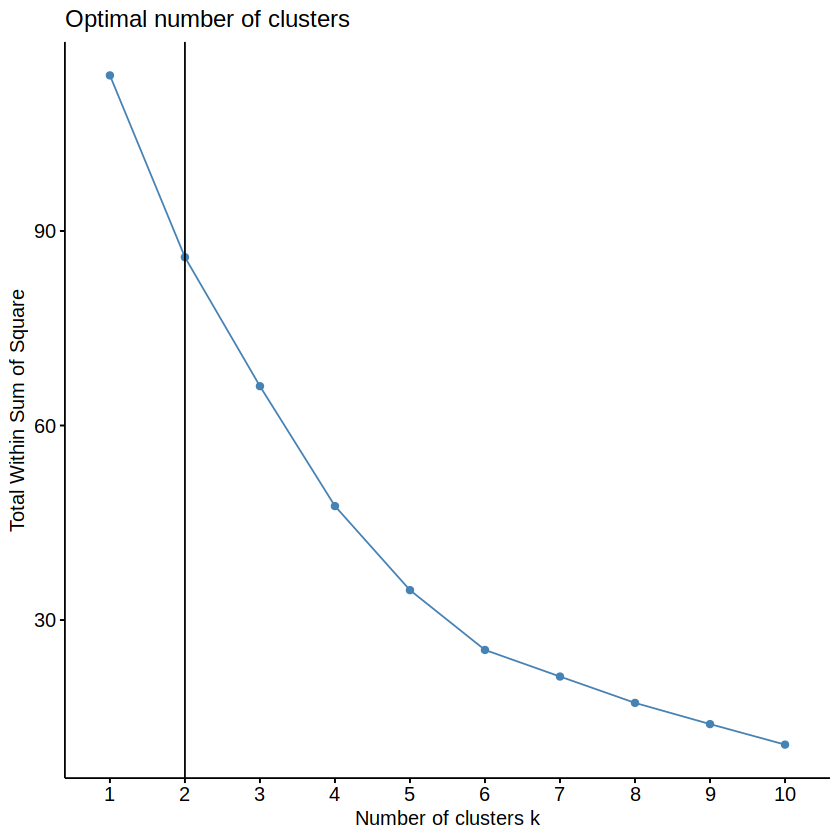

In [188]:
# On utilise la fonction du package factoextra :
# ici c'est la variance intraclasse qui est représentée (comme souvent) 
# il n'y a pas de coude très marqué 
fviz_nbclust(eco_europe_scale, kmeans, nstart=100, method = "wss") + 
  geom_vline(xintercept = 2, linetype = 1)

Vu la décroissance de la courbe on ne peut pas dire que les données suffisent à séparer vraiment les pays de la zone euro des autres, cependant cela peut simplement signifier que l'on peut pas interprêter cette séparation par des données économiques, démographiques etc...

In [191]:
km = kmeans(eco_europe_scale, nstart=5, center=2)

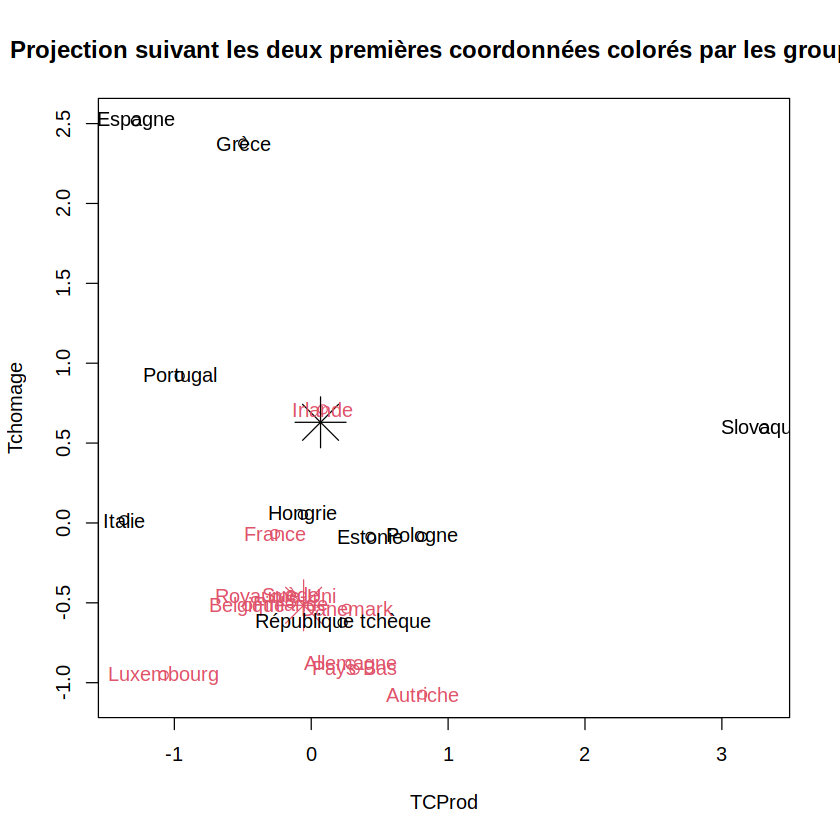

In [199]:
plot(eco_europe_scale, col=km$cluster, main='Projection suivant les deux premières coordonnées colorés par les groupes')
points(km$centers, col=1:2, pch=8, cex=4)
text(eco_europe_scale, rownames(eco_europe_scale), col=km$cluster)

Sur cette visualisation, on peut voir que les pays de la zone euro sont plutôt en bas à gauche du nuage de points.

[1] 0.2459883 0.4204877 0.5402393 0.6964112 0.7773494 0.8130011 0.8462632
[8] 0.8767329 0.8978234

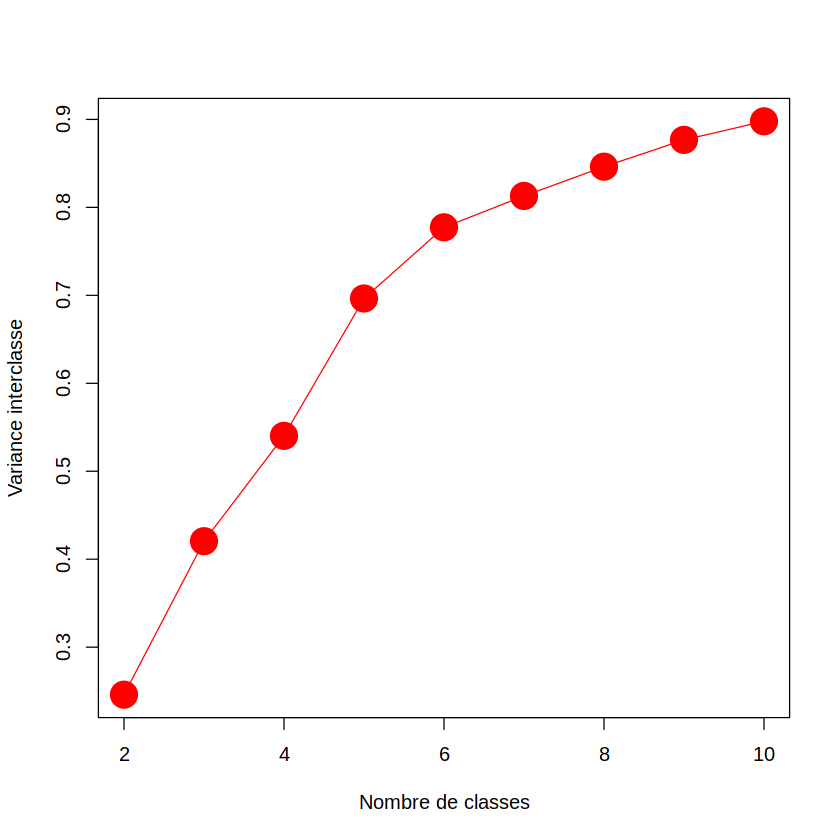

In [206]:
inertie_expliquee = function(data,nb_clusters){
  critere = vector("numeric", length=nb_clusters-1)
  for (k in 2:nb_clusters){
    cl = kmeans(data, centers = k, nstart=5)
    critere[k-1] = cl$betweenss / cl$totss
  }
  critere
}

output = inertie_expliquee(eco_europe_scale,10)
output
plot(2:10, output, cex=3, type = "b", pch = 19, 
     col = "red", xlab = "Nombre de classes", ylab = "Variance interclasse")

## CAH

On commence par calculer la matrice de distances entre les pays en utilisant la **distance euclidienne** :

In [211]:
distance = dist(eco_europe_scale, "euclidean")

In [213]:
# on lance maintenant le clustering avec la distance de ward
h = hclust(distance, "ward.D2")

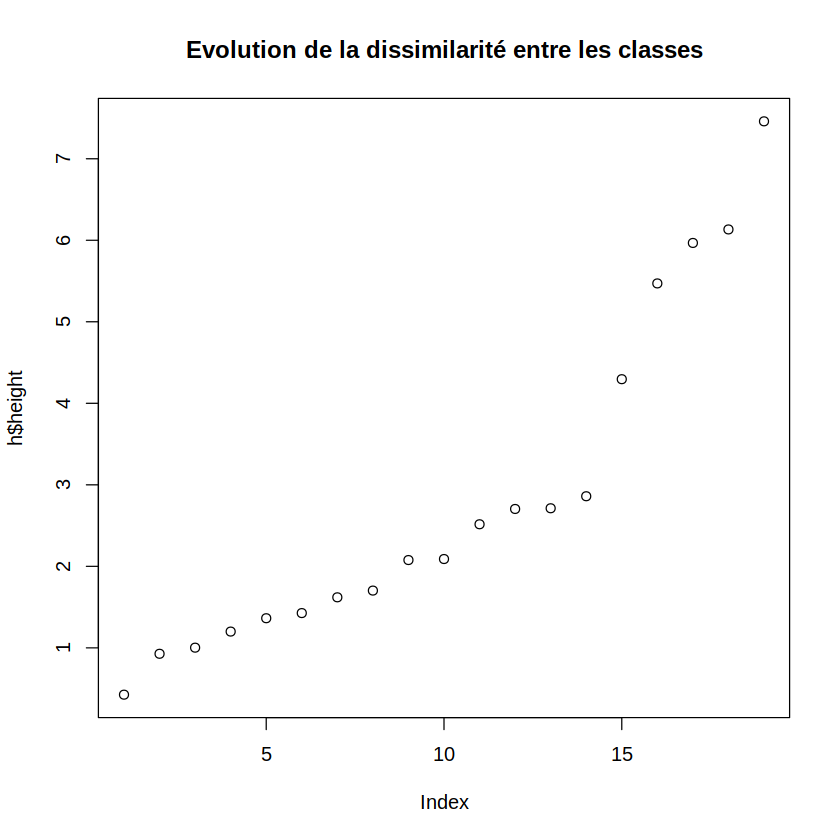

In [215]:
plot(h$height, main="Evolution de la dissimilarité entre les classes")

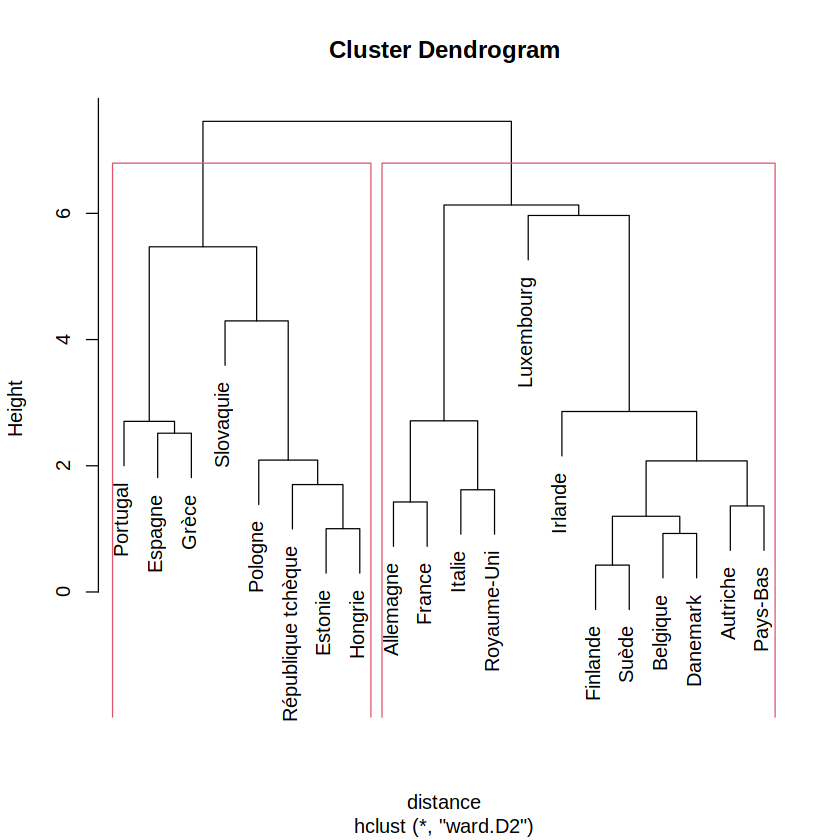

In [220]:
plot(h)
rect.hclust(h, k=2) # ajoute les classes

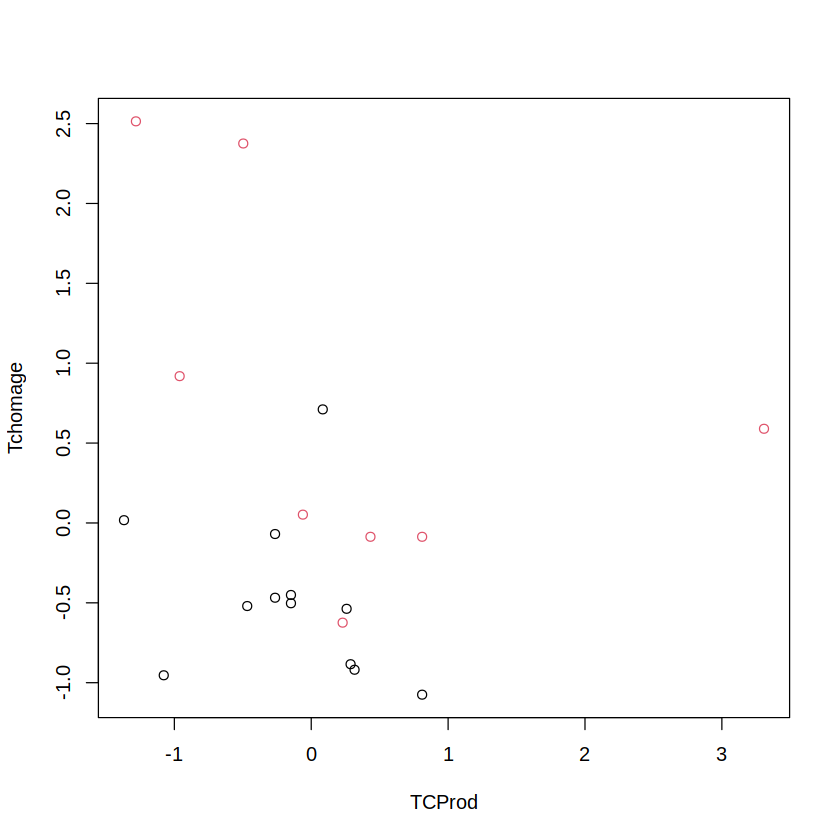

In [221]:
# On colorie les points selon que l'on garde k classes (ici k=2)
c = cutree(h, k=2)     # récupère les classes

plot(eco_europe_scale, col=c) 

# Pour finir une visualisation tsne
On rappelle que le t-SNE est une méthode de réduction de dimension (qui est probabiliste et donc modifie les métriques i.e. la distance réelle entre les points).
Elle permet de visualiser les données, voici l'article originel : https://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf

Attention : cette méthode ne sert qu'à la visualisation des données, contrairement à une ACP elle **ne doit pas** être utilisée comme un préprocessing (pré-traitement) des données pour y appliquer un algo de machine learning.

In [3]:
library(tsne)

On va appliquer l'algorithme au jeu de données iris pour visualiser ces fleurs qui sont définies par 4 variables qualitatives (longueur / largeur sépal/pétal) et 1 variable qualitative (espèce)

In [4]:
data(iris)

In [7]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [82]:
coordonnées_tsne_iris = tsne(iris[,1:4])
coordonnées_tsne_iris = as.data.frame(coordonnées_tsne_iris)

sigma summary: Min. : 0.486505661043274 |1st Qu. : 0.587913800179832 |Median : 0.614872437640536 |Mean : 0.623051089344394 |3rd Qu. : 0.654914112723525 |Max. : 0.796707932771489 |
Epoch: Iteration #100 error is: 13.1119639728932
Epoch: Iteration #200 error is: 0.265460985515516
Epoch: Iteration #300 error is: 0.257020930993777
Epoch: Iteration #400 error is: 0.256703767390637
Epoch: Iteration #500 error is: 0.256663473086056
Epoch: Iteration #600 error is: 0.256656446041763
Epoch: Iteration #700 error is: 0.256655224969935
Epoch: Iteration #800 error is: 0.256655029125182
Epoch: Iteration #900 error is: 0.256654997405886
Epoch: Iteration #1000 error is: 0.256654992351949


On voit apparaître des sorties : 
**Epoch: Iteration #X00 error is: 0.25........** 
En effet à chaque étape (époque), le tsne optimise la projection avec une descente de gradient.

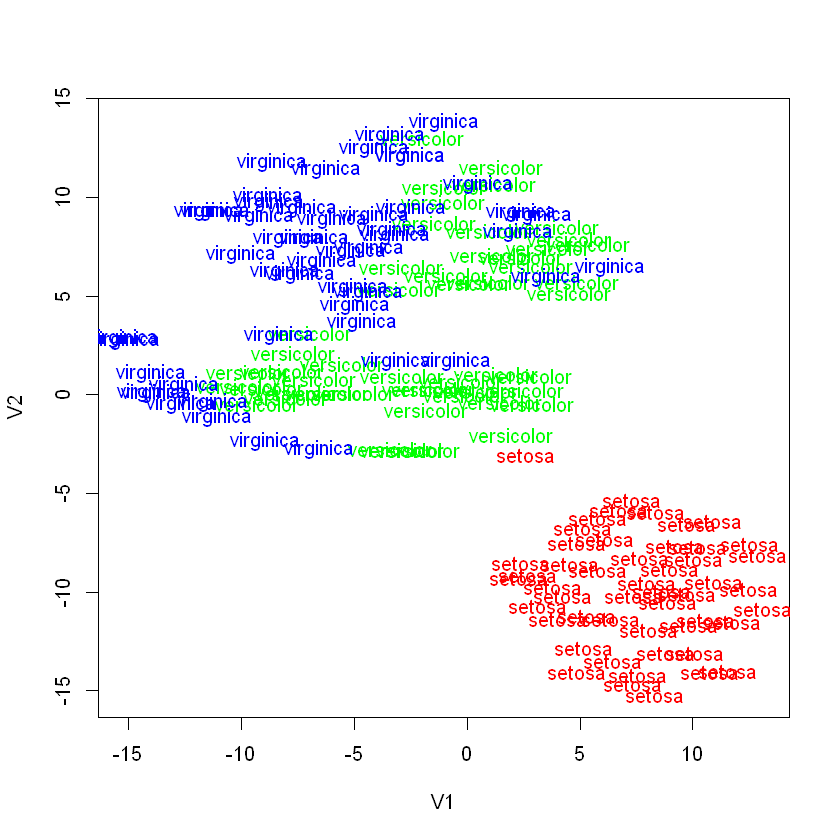

In [84]:
 plot(V2~V1, data=coordonnées_tsne_iris,t='n'); text(coordonnées_tsne_iris,labels=iris$Species, col=colors[iris$Species])